# 多腕バンデッド問題_確率が変わる場合

# 皆様のプログラムの列挙

In [1]:
#例外的扱い
class MaxStrategy:
    ''' ランダムにスロットマシンを引く戦略
    '''
    def __init__(self, m):
        self.mab = m;
    def learn(self,k, result):
        return

    def choice(self):
        return (self.mab).getmaxind()

    def reset(self):
        return

In [2]:
#1
class TsuikiStrategy_B:
    ''' 前のが当たったらそれを引く戦略
    インスタンス変数:
        my : 次に引く手
    '''
    def __init__(self):
        self.my = 0
    def learn(self, k, result):
        if (result == 1):
            self.my = self.my;
        else:
            self.my = (self.my + 1)% MultiArmedBandit.NUM

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [3]:
#2
class RandomStrategy_B:
    ''' ランダムにスロットマシンを引く戦略
    '''
    def learn(self,k, result):
        return

    def choice(self):
        return random.randrange(MultiArmedBandit.NUM);

    def reset(self):
        return

In [4]:
#3
class ConstantStrategy_B:
    def learn(self,k, result):
        return

    def choice(self):
        return 0

    def reset(self):
        return

In [5]:
#4
class NakasoneStrategy_B:
    def __init__(self):
        self.count = 0
        self.bandit =[]
        self.times = 12
        for _ in range(3):
            self.bandit.append(0)
    
    def learn(self, k, result):
        self.count += 1
        for n in range(3):
            if n == k and result == 1:
                self.bandit[n] += 1

    def choice(self):
        if self.count <= self.times:
            self.number = self.count%3
        if self.count > self.times:
            self.number = self.bandit.index(max(self.bandit))
        return self.number
    
    def reset(self):
        self.count = 0
        self.bandit = []
        self.times = 12
        for _ in range(3):
            self.bandit.append(0)

In [6]:
#5
class YoshinoStrategy_B:
    ''' 前のが当たったらそれは次は当たらないと考え、それ以外からひく戦略　外れたらランダムに引く。
    インスタンス変数:
        my : 次に引く手
    '''
    def __init__(self):
        self.my = 0
    def learn(self, k, result):
        if (result == 1):
            self.my != self.my
        else:
            self.my = random.randrange(MultiArmedBandit.NUM);
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [7]:
#6
class FujiwaraStrategy_B:
    ''' 自分のstrategy
    3回連続ではずれを引いたなら次に行く.
    ただし初回に引くときは2回連続ではずれを引いたことになっている.
    '''
    def __init__(self):
        self.my = 0
        self.past1 = 0
        self.past2 = 0

    def learn(self,k, result):
        if(result==0 and self.past1==0  and self.past2==0):
            self.my = (self.my+1) % MultiArmedBandit.NUM
        self.past2 = self.past1
        self.past1 = result
        return

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.past1 = 0
        self.past2 = 0
        return

In [8]:
#7
import random
class OhgaStrategy_B:
    def __init__(self,para=10,para2=0.93):
        self.para=para #scoreの初期値
        self.para2=para2 #減衰パラメータ
        self.score=[self.para]*3

    def learn(self,k,learn):
        for i in range(3):
            self.score[i]*=self.para2 #新しい情報を信用する
        self.score[k]+=7*learn-3
        for i in range(3):#ゼロ除算対策
            if self.score[i]<0.001:
                self.score[i]=0.001

    def choice(self):
        self.r=random.uniform(0,1)
        self.s=sum(self.score)
        #scoreが高いものを選びやすい
        if(self.score[0]/self.s>self.r):
            self.c=0
        elif((self.score[0]+self.score[1])/self.s>self.r):
            self.c=1
        else:
            self.c=2
        return self.c
    def reset(self):
        self.score=[self.para]*3

In [9]:
#8
#引いた回数がlearnから与えられるかのようなプログラムになっていた。
#これではエラーなので、TAが引いた回数を表す変数iを導入した。

"""class KoikeAtuya2Strategy:
    ''' 最初の30回で一番pが大きいスロットマシンを推定する
    確率が変動するスロットマシン用
    インスタンス変数:
        my : 次に引く手
    '''
    def __init__(self):
        self.my = 0
        self.acc=[0,0,0]#外れたら-1点当たったら+1点とするリストを作る
    def learn(self,i,k,result):
        if i<=9:
            self.my=0
            if result==1:
                self.acc[0]+=1
            else:
                self.acc[0]+=-1
        if i<=19 and i>=10:
            self.my=1
            if result==1:
                self.acc[1]+=1
            else:
                self.acc[1]+=-1
        if i<=29 and i>=20:
            self.my=2
            if result==1:
                self.acc[2]+=1
            else:
                self.acc[2]+=-1
        else:
            if result==1:    #30回目以降も点数をつけていく
                self.acc[k]+=1
            if result==0:
                self.acc[k]+=-1
            self.my=self.acc.index(max(self.acc)) #一番点数が高いスロットマシンを選ぶ

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0"""

class KoikeStrategy_B:
    ''' 最初の30回で一番pが大きいスロットマシンを推定する
    確率が変動するスロットマシン用
    インスタンス変数:
        my : 次に引く手
    '''
    def __init__(self):
        self.my = 0
        self.acc=[0,0,0]#外れたら-1点当たったら+1点とするリストを作る
        self.i=0

    def learn(self,k,result):
        if self.i<=9:
            self.my=0
            if result==1:
                self.acc[0]+=1
            else:
                self.acc[0]+=-1
        if self.i<=19 and self.i>=10:
            self.my=1
            if result==1:
                self.acc[1]+=1
            else:
                self.acc[1]+=-1
        if self.i<=29 and self.i>=20:
            self.my=2
            if result==1:
                self.acc[2]+=1
            else:
                self.acc[2]+=-1
        else:
            if result==1:    #30回目以降も点数をつけていく
                self.acc[k]+=1
            if result==0:
                self.acc[k]+=-1
            self.my=self.acc.index(max(self.acc)) #一番点数が高いスロットマシンを選ぶ
            
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.i=0

In [10]:
#9
class MotonishiStrategy_B:
    ''' my : 次に引く手
        con:直前の３つ以下の結果を表す
        変化するとき用
    '''
    def __init__(self):
        self.my = 0
        self.con = []
    def learn(self, k, result):
        self.con.append(result)
        if (len(self.con)==4):
            del self.con[0]
        if (self.con == [0])or(self.con==[1,0])or(self.con==[1,0,0])or(self.con==[0,1,0]):
            self.my = (self.my +1)%MultiArmedBandit.NUM
            self.con = []
        else:
            self.my = self.my

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.con = []

In [11]:
#10
class MatsumotoStrategy_B:
    """
    MatsumotoStrategy_Aとほとんど同じだが、
    それぞれのマシンの当たり確率は、そのマシンを引いた直近の100回
    のみで計算する点が異なる。
    """
    def __init__(self):
        self.total = 0
        self.total_list = [0 for _ in range(MultiArmedBandit.NUM)]
        self.cnt_list = [[] for i in range(MultiArmedBandit.NUM)]
        self.p_list = [0 for _ in range(MultiArmedBandit.NUM)]
        self.my = 0

    def learn(self, k, result):
        self.total += 1

        if self.total // MultiArmedBandit.NUM < 100:
            self.total_list[k] += 1
        
        self.cnt_list[k].append(result)

        if self.total // MultiArmedBandit.NUM >= 100:
            self.cnt_list[k].pop(0)
        
        self.p_list[k] = sum(self.cnt_list[k]) / self.total_list[k]

        if self.total // MultiArmedBandit.NUM < 100:
            self.my = self.total % MultiArmedBandit.NUM
        else:
            self.my = self.p_list.index(max(self.p_list))

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [12]:
#11
class HigoStrategy_B:
    '''最後の何回かで高確率であればそれを引く戦略
    インスタンス変数：
        my:次に引く手
        range:確率を考える際に考慮する最後からの範囲
        count:長さが連続で引いた回数とrangeの最小値であるような1だけを要素に持つリスト
        atari:1の要素の個数が最後からrange回目までで当たった回数であるような0と1のみを要素に持つリスト'''
    def __init__(self):
        self.my=0
        self.range=5
        self.count=[]
        self.atari=[]
    def learn(self,k,result):
        if(len(self.count)==self.range):
            del self.count[0]
            del self.atari[0]
        self.count.append(1)
        self.atari.append(result)

        if(len(self.count)==1 or sum(self.atari)/sum(self.count)<0.499):
            self.my=(self.my+1)%MultiArmedBandit.NUM
    def choice(self):
        return self.my
    def reset(self):
        self.my=0
        self.count=[]
        self.atari=[]

In [13]:
#12
import random
class NishiokaStrategy_B:
    #当たった割合だけそれを引く確率をあげる。
    def __init__(self):
        self.l = [[] for _ in range(3)] #当たりはずれをすべて記録するリスト。
        self.p_list = [0, 0, 0] #当たりの割合を記録するリスト。
        self.p_standard = [1/3, 1/3, 1/3] #self.p_listを規格化したもの。

    def learn(self, k, result):
        self.l[k].append(result)
        for i in range(3):
            if len(self.l[i]) == 0:
                self.p_list[i] = 1 #確率が0にならないように初期値は1にしておく。
            else:
                self.p_list[i] = 1 + 2 * sum(self.l[i]) / len(self.l[i])
        for i in range(3):
            self.p_standard[i] = self.p_list[i] / sum(self.p_list)

    def choice(self):
        a = random.uniform(0, 1)
        if 0 <= a < self.p_standard[0]:
            return 0
        if self.p_standard[0] <= a < 1 - self.p_standard[2]:
            return 1
        if 1- self.p_standard[2] <= a <= 1:
            return 2
            
    def reset(self):
        return

In [14]:
#13
import random
import numpy as np

class NakahashiStrategy_B:
    '''ランダムに探索を挟みながら引く'''
    def __init__(self):
        self.my = 0
        self.hit = [0,0,0]
        self.total = [0,0,0]
        self.prob = [0,0,0]

    def learn(self, k, result):
        self.total[k] +=1
        if result == 1:
            self.hit[k] += 1
        else:
            pass
        self.prob[k] = self.hit[k]/self.total[k]            # 各マシンの当たる確率を計算する
        
        if sum(self.total) <= 75:                           # 最初の75回のうち、
            if (sum(self.total) <= 10) or (random.choice([0,0,0,0,1]) == 1):    # 初めの10回と、その後の65回中20％の確率で
                self.my = random.randrange(MultiArmedBandit.NUM)                # ランダムで引く
            else:
                self.my = np.argmax(self.prob)              # 10回目以降、80％の確率で最も確率の高いマシンを引く
        else:
            self.my = np.argmax(self.prob)                  # 残りの25回は最も確率の高いマシンを引き続ける

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [15]:
#14
class YoshimuraStrategy_B:
    ''' 前のが当たったらそれを引く戦略
    インスタンス変数:
        my : 次に引く手
    '''
    def __init__(self):
        self.my = 0
        self.number = [5]*3 #各スロットを引いた回数 初期値は5
        self.hitnum = [6]*3 #各スロットで当たりを引いた回数 初期値は6
        self.currentmean = [5/6]*3
        self.count = 0
        self.currentmax = 0
        
    def learn(self, k, result):
        #初めの3回で各スロットを1回ずつ引く
        if (self.count <= 3 - 1):
            self.my = self.count % 3
            self.number[self.my] += 1
            self.hitnum[self.my] += result
        else:
            self.number[self.my] += 1
            self.hitnum[self.my] += result
            #平均値更新(前平均値と今回の平均値との差に比例した値を今回の平均に加える)
            pre_currentmean = self.currentmean[self.my]
            self.currentmean[self.my] = self.hitnum[self.my] / self.number[self.my]
            self.currentmean[self.my] += (self.currentmean[self.my] - pre_currentmean) * 0.5
            #currentmax更新
            max = 0
            for j in range(0, 3):
                if(max < self.currentmean[j]):
                    self.currentmax = j
                    max = self.currentmean[j]
            self.my = self.currentmax

        self.count += 1
        #確認用
        #print(f"count = {self.count}, number = {self.number}, hitnum = {self.hitnum}, mean = {self.currentmean}, max = {self.currentmax}")

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.number = [5]*3
        self.hitnum = [6]*3
        self.currentmean = [5/6]*3
        self.count = 0
        self.currentmax = 0

In [16]:
#15
#小規模修復不可能、10回ずつ引いて1番当たるものを引き続ける戦略との記載ありなのでそれに書き換え
"""class KitamuraStrategy:
    def __init__(self):
        self.my = 0
        self.i = 0
        self.atari = [0]*MultiArmedBandit.NUM
        m = MultiArmedBandit()
        
    def learn(self, k, result):
        for i in range(3):
            for j in range(30):
                result = m.slot(i%3)
                self.atari[i] += result
        self.my = self.atari.index(max(self.atari))
        
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0"""
        
class KitamuraStrategy_B:
    def __init__(self):
        self.my = 0
        self.i = 0
        self.atari = [0]*MultiArmedBandit.NUM
        
    def learn(self, k, result):
        self.i+=1
        self.atari[k]+=result
        
        if self.i<30:
            self.my = self.i%3
        else :
            self.my = self.atari.index(max(self.atari))
        
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.i = 0
        self.atari = [0]*MultiArmedBandit.NUM

In [17]:
#16
class KitaStrategy_B:
    def __init__(self):
        self.pros = [0,0,0]
        self.recent = 0
        self.loop = 0
        self.zeroco = 0

    def learn(self,k, result):
        self.pros[k] += result
        self.loop += 1
        self.recent = k
        if(result == 0):
            self.zeroco += 1
        return

    def choice(self):
        if(self.loop/3 < 4):
            return (self.recent + 1) % 3
        else:
            if(self.zeroco > 2):
                self.zeroco = 0
                return (self.recent + 1) % 3
            else:
                return self.pros.index(max(self.pros))

    def reset(self):
        self.pros = [0,0,0]
        self.recent = 0
        self.loop = 0
        return

In [18]:
#17
#何が間違っていているかわからないがエラーになる。
"""
class NozakiStrategy:

    import numpy as np
    A = np.array([100,100,100])
    B = np.array([100,100,100])

    def __init__(self):
        self.my = 2

    def learn(self,k,result):

        A[k] += 1

        if (result == 1):
            B[k] += 1
        else:
            B[k] += -1

        C = B/A

        self.my = C.argmax()

    def choice(self):
        return self.my 

    def reset(self):
        self.my = 0
        A = np.array([100,100,100])
        B = np.array([100,100,100])"""

class NozakiStrategy_B:

    def __init__(self):
        self.my = 2
        self.A = np.array([100,100,100])
        self.B = np.array([100,100,100])

    def learn(self,k,result):

        self.A[k] += 1

        if (result == 1):
            self.B[k] += 1
        else:
            self.B[k] += -1

        C = self.B/self.A

        self.my = C.argmax()

    def choice(self):
        return self.my 

    def reset(self):
        self.my = 0
        self.A = np.array([100,100,100])
        self.B = np.array([100,100,100])

In [19]:
#18
class ZivStrategy_B:
    def __init__(self):
        self.prob = [0]*MultiArmedBandit.NUM
        self.count = [0]*MultiArmedBandit.NUM
        self.atari = [0]*MultiArmedBandit.NUM
        self.turn = 0
    
    def learn(self, k, result):
        # Handle the input
        self.count[k] += 1
        self.atari[k] += result
        self.prob[k] = self.atari[k]/self.count[k]
        
        # Adjust the probability randomly as the Badit did
        for i in range(len(self.prob)):
            if(random.uniform(0,1) < 0.5):
                self.prob[i] = max(self.prob[i] - 0.05, 0)
            else:
                self.prob[i] = min(self.prob[i] + 0.05, 1)

    
    def choice(self):
        # Test every slot for n times at first
        time = 4
        if self.turn < MultiArmedBandit.NUM*time:
            k = self.turn % MultiArmedBandit.NUM
            self.turn = self.turn + 1
            return k

        # After testing every slot n times, analyse the prob list
        def max_zero_problist(lt,zero_mode=False):
            if zero_mode:
                m = 0
            else:
                m = max(lt)
            lt2 = []
            for i in range(len(lt)):
                if lt[i] == m:
                    lt2.append(i)
            return lt2

        maxprob = max_zero_problist(self.prob)
        zerogroup = max_zero_problist(self.prob,True)

        # Random pick from maxprob 80% of the time and random pick from zerogroup 20% of the time (given zero exist)
        if zerogroup:
            threshold = random.uniform(0,1)
            if threshold < 0:
                return random.choice(zerogroup)
            else:
                return random.choice(maxprob)
            
        return random.choice(maxprob)
    
    def reset(self):
        self.prob = [0]*MultiArmedBandit.NUM
        self.count = [0]*MultiArmedBandit.NUM
        self.atari = [0]*MultiArmedBandit.NUM
        self.turn = 0

In [20]:
#19
#resetでinitでするべきことが書かれてない。
class KimuraStrategy_B:
    ''' 前のが当たったらそれを引く戦略をしつつ、当たる確率が低いと判断されるものは切り捨てる戦略
    インスタンス変数:
        my : 次に引く手
        kekka : スロットnで何が出たかを記録する
        candi : まだ切り捨てられてないスロットのリスト 切り捨てたら-1かける
    '''
    def __init__(self):
        self.my = 0
        self.W=[]
        self.kekka = []#n番目のリストにスロットnで何が出たかを記録する
        self.candi = []#選ぶスロットの候補　最終的には絞っていくので
        for i in range(MultiArmedBandit.NUM):
            self.kekka += [[]]
            self.candi += [i]

    
    def learn(self, k, result):#kekkaで学習=>打ち切るべきものがあれば判断=>次に引く手を考える
        self.kekka[self.my] += [result]

        if min(list(map(lambda x: len(x), self.kekka))) > 6*(MultiArmedBandit.NUM-len(self.candi)+1) and len(self.candi) > 1:
            self.W = list(map(lambda x: sum(x)/len(x), self.kekka))
            if self.candi[self.W.index(min(self.W))] > 0:
                self.candi[self.W.index(min(self.W))] *= -1
                self.kekka[self.W.index(min(self.W))] += [1]*6*MultiArmedBandit.NUM  #3行上の絞る作業を邪魔せぬよう。もっといい方法もあるかもしれない
        
        if (result == 1):
            self.my = self.candi[self.my];
        else:
            self.my = self.candi[(self.my + 1)% MultiArmedBandit.NUM]
        while self.my < 0:
            self.my = self.candi[(abs(self.my) + 1)% MultiArmedBandit.NUM]

            


    def choice(self):
        return self.my


    def reset(self):
        self.my = 0
        self.kekka = []
        self.candi = []
        self.W = []
        for i in range(MultiArmedBandit.NUM):
            self.kekka += [[]]
            self.candi += [i]

In [21]:
#20
class MukaiStrategy_B:
    '''
    lt is how much slot try
    lw is how much slot win
    la is how often slot win
    my is the number of slot you take next
    if result is not 1,
    take another slot, whose la is highest.
    and, if k equal self.my, take slot whose la is secondly highest.
    '''
    def __init__(self):
        self.lt = []
        self.lw = []
        self.la = []
        self.l1 = []
        for i in range(MultiArmedBandit.NUM):
            self.lt += [0]
            self.lw += [0]
            self.la += [0]
            self.l1 += [0]
        self.my = 0
    def cul(self, k, result):
        self.lt[k] += 1
        if result == 1:
            self.lw[k] += 1
        self.la[k] = (self.lw[k]/self.lt[k])
        
    def learn(self, k, result):
        self.cul(k, result)
        self.l1 = sorted(self.la)
        if result ==1:
            self.my = k
        else:
            self.my = self.la.index(self.l1[-1])
            if self.my == k:
                self.my = self.la.index(self.l1[-2])
        if sum(self.lt)<16:
            self.my = (k + 1)% MultiArmedBandit.NUM



    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [22]:
#21
class OshimaStrategy_B:
    def __init__(self):
        self.my=0
        self.x=0
        self.y=0
    def learn(self,k,result):
        self.x=self.x+1
        self.y=self.y+result
        if(self.x==3):
            if(self.y>=2):
                self.my=self.my
            else:
                self.my= (self.my + 1)% 3
            self.x=0
            self.y=0
    def choice(self):
        return self.my
    def reset(self):
        self.my=0
        self.x=0
        self.y=0

In [23]:
#22
class YasudaStrategy_B:
    '''10回ずつ引いて一番結果が良かったもので残りの回数分引く戦略'''
    def __init__(self):
        self.re=[]
    def learn(self,k,result):
        self.re.append(result)
        
    def choice(self):

        if(len(self.re)<10):
            return 0
        elif(len(self.re)<20):
            return 1
        elif(len(self.re)<30):
            return 2
        else:
            li=[sum(self.re[0:10]),sum(self.re[10:20]),sum(self.re[20:30])]
            k=max(li)
            for i in range(40,100):
                if(i%10==0):
                    li[li.index(k)]=sum(self.re[i-10:i])
                    k=max(li)
            return li.index(k)

    def reset(self):
        self.re=[]

In [24]:
#23
class YamaguchiStrategy_B:
    ''' YamaguchiManaの戦略
    '''
    def __init__(self):
        self.count = 0;
        self.box = [[0,0],[0,0],[0,0]]
        
    def learn(self,k, result):
        self.box[k][0]+=1
        self.box[k][1]+=result
        self.count +=1
        return

    def choice(self):
        if self.count<=30:
            return self.count%3
        else:
            mmax = -1
            ans = -1
            for i in range(3):
                if mmax<self.box[i][1]/self.box[i][0]:
                    mmax=self.box[i][1]/self.box[i][0]
                    ans = i
            return ans

    def reset(self):
        return

In [25]:
#24
class HiraideStrategy_B:
    def __init__(self):
        self.my = 0
        self.n = [0,0,0,0,0]
    def learn(self, k, result):
        if (self.n[3] <3):
            if (result == 1):
                self.my = self.my
                self.n[k] += 1
                self.n[3] += 1
            else:
                self.my = (self.my + 1)% 3
        else:
            self.my = np.argmax(self.n[0:3])
            if (self.n[4] < 5):
                self.n[4] += 1
            else:
                self.n = [0,0,0,0,0]
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.n = [0,0,0,0,0]

In [26]:
#25
class SaitouStrategy_B:
    """
    スロットの確率の分布をおおざっぱに正規分布として近似して、まだもっともよい可能性が標準偏差×定数(パラメータ)以内で残っているマシンだけをランダムで抽選する
    
    ただし、スロットの確率の分布を考える際に、毎回これまでの記録をself.c倍する。つまり、self.c=0.9として、1,3回目にマシンAを引いて、両方当たった場合、
    1回目時点:引いた回数=1,当たった奇数=1
    2回目時点:引いた回数=0.9,当たった奇数=0.9
    3回目時点:引いた回数=1.81,当たった奇数=1.81
    という風にする。そうすると、過去の当たりはずれの寄与をすこし小さくできそう
    """
    def __init__(self):
        self.K = np.array([0]*MultiArmedBandit.NUM) #それぞれのマシンを引いた回数+1
        self.T = np.array([0]*MultiArmedBandit.NUM) #それぞれのマシンで当たった回数
        self.a = 0.14 #幅の広さの目安
        self.b = 94.4 #残り回数が減った時にどれくらい幅を小さくするかの目安
        self.c = 0.983 #一回引くたびにこれまでの結果をc倍にする
        self.M = 100 #残り回数
        
    def learn(self,k, result):
        self.K=self.K*self.c
        self.T=self.T*self.c
        self.K[k] += 1
        self.T[k] += result
        self.M = max(1,self.M)
        
    def choice(self):
        K = np.where(self.K <= 1 ,1,self.K)
        T = np.where(self.T <= 1 ,1,self.T)
        try:
            if self.b ==0:
                B = 1
            else:
                B = (1-np.exp(-self.M/self.b)) 
        except:
            B = 1
        A = B*self.a*np.sqrt((T/K)*(1-T/K))/np.sqrt(K)
        # print(K.dtype)
        MIN_p = T/K-A
        # print(MIN_p)
        MAX_p = T/K+A
        Is_choice = np.where(MAX_p > np.max(MIN_p),1,0)
        if not np.sum(Is_choice)==0:
            Is_choice = Is_choice/np.sum(Is_choice)
            return np.random.choice(MultiArmedBandit.NUM,1,p = Is_choice)[0]
        else:
            return random.randint(0,2)
        
    def reset(self):
        self.K = np.array([1]*MultiArmedBandit.NUM) #それぞれのマシンを引いた回数
        self.T = np.array([0]*MultiArmedBandit.NUM) #それぞれのマシンで当たった回数   
        self.M = 100

In [27]:
#26
import random

class UmemuraStrategy_B:
  
    choiceret = [0,0,0,0,0,0,0,0,1,1]

    def __init__(self):
        self.ret = [0]*3
        self.draw = 0

    def learn(self,k,result):
        if (result == 1):
            self.ret[self.draw] += result
        else:
            self.ret[self.draw] += result

    def choice(self):
        if (random.choice(self.choiceret) == 1):
            self.draw = random.choice([0,1,2])
            return self.draw
        else:
            self.draw = self.ret.index(max(self.ret))
            return self.draw
     
    def reset(self):
        self.draw = 0
        self.ret = [0]*3

In [28]:
#27
class WatanabeStrategy_B:

    def __init__(self):
        self.my = 0;
        self.f = 0;
        self.counts = []
        self.lastcounts = [0,0,0]
        self.cnt = 0;
       
            
    def learn(self, k, result):
        if(self.cnt >= 93):
            self.lastcounts[self.my] += 1;
        if(self.cnt == 99):
            for i in range (3):
                if(self.lastcounts[i] == max(self.lastcounts)):
                    self.my = i;
            self.my = 0;
            self.f = 0;
            self.counts = []
            self.lastcounts = [0,0,0]
            self.cnt = 0;
            
        if(self.f == 3):
            if(sum(self.counts) > 1):
                self.my = self.my;
            else:
                self.my = (self.my + 1)% MultiArmedBandit.NUM
            self.f = 0
            self.counts = []
        else:
            self.counts.append(result);
            self.f += 1;
            
        self.cnt += 1;
            

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [29]:
#28
class IshidaStrategy_B:
    ''' 前のが当たったらそれを引き、6連続で当たったらそれを引き続ける戦略
    '''

    def __init__(self):
        self.dada = [3,0,0,0,0,0,0]
    def learn(self, k, result):
        if ((self.dada[0] == self.dada[1] == self.dada[2] == self.dada[3] == self.dada[4] == self.dada[5])):
            return
        else:
            self.dada[5] = self.dada[4]
            self.dada[4] = self.dada[3]
            self.dada[3] = self.dada[2]
            self.dada[2] = self.dada[1]
            self.dada[1] = self.dada[0]
            if (result == 1):
                self.dada[0] = k
            else:
                self.dada[0] = (self.dada[0] + 1)% MultiArmedBandit.NUM


    def choice(self):
        return self.dada[0]% MultiArmedBandit.NUM

    def reset(self):
        self.dada = [0,3,3,3,3,3]

In [30]:
#29
class FujimotoStrategy_B:
    ''' 8回づつすべてのスロットで実行し一番確率の高いもので継続
    '''
    def __init__(self):
        self.list_bandit = [0]* MultiArmedBandit.NUM
        self.numplay = 0
        self.maxbandit = 0
        self.index = 5

    def learn(self,k, result:int):
        self.list_bandit[k] += result
        if self.numplay == self.index * MultiArmedBandit.NUM:
            self.maxbandit = self.list_bandit.index(max(self.list_bandit))
            # print("0select",self.maxbandit)
            # print("0result",self.list_bandit)

    def choice(self) -> int:
        self.numplay += 1

        while self.numplay < ((self.index * MultiArmedBandit.NUM) + 1):
            return self.numplay % MultiArmedBandit.NUM
        
        return self.maxbandit

    def reset(self):
        self.list_bandit = [0] * MultiArmedBandit.NUM
        self.numplay = 0
        self.maxbandit = 0

In [31]:
#30
class NishimiyaStrategy_B:
    ''' 前のが当たったらそれを引く戦略
    インスタンス変数:
        my : 次に引く手
    '''
    def __init__(self):
        self.my = 0
    def learn(self, k, result):
        if (result == 1):
            self.my = self.my;
        else:
            self.my = (self.my + 1)% MultiArmedBandit.NUM

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [32]:
#31
class NodaStrategy_B:
    ''' 蠖薙◆繧翫〒縺ゅｌ縺ｰ遏･隴倥Μ繧ｹ繝医↓縺昴�繧ｹ繝ｭ繝�ヨ縺ｮ逡ｪ蜿ｷ繧貞刈縺医∫衍隴倥°繧峨Λ繝ｳ繝繝�縺ｫ谺｡縺ｮ謇九ｒ驕ｸ縺ｶ縲ょ､悶ｌ縺溘ｉ遏･隴倥↓縺ｯ蜉�縺医★縺ｫ縲√∪縺溽衍隴倥°繧峨Λ繝ｳ繝繝�縺ｫ谺｡縺ｮ謇九ｒ驕ｸ縺ｶ縺後∝燕蝗槭�謇九→蜷後§縺�縺｣縺溘ｉ荳蝗槭ｄ繧顔峩縺吶�
    '''
    def __init__(self):
        import copy
        self.my = 0
        self.knowledge = [0, 1, 2]
    def learn(self, k, result):
        if result == 1:
            self.knowledge.append(k)
            self.my = random.choice(self.knowledge)
        else:
            self.my = random.choice(self.knowledge)
            if self.my == k:
                self.my = random.choice(self.knowledge)
        
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [33]:
#32
#TAストラテジー、アーム確率変動の方

class TAStrategy_B:
    def __init__(self):
        self.arm = [[1/21]*21 for _ in range(MultiArmedBandit.NUM)] #各アームごとに21個の値をとる確率分布を用意
        self.value = [0] * MultiArmedBandit.NUM
        
    def choice_result(self,list1,result): #当たったか外れたかによって想定できる確率が変わるのでそれを変える(比のみ)
        if result == 1:
            for i in range(21):
                list1[i] = list1[i] * 0.05 * i
        else:
            for i in range(21):
                list1[i] = list1[i] * 0.05 * (20-i)
        return list1

    def normalization(self,list1): #確率分布になるよう和を1にする 
        total = sum(list1)
        for i in range(21):
            list1[i] = list1[i] / total
        return list1

    def change_prob(self,list1): #全てのアームの確率分布を変える
        list2 = [0] * 21
        list2[0] = 0.5 * (list1[0] + list1[1])
        list2[20] = 0.5 * (list1[19] + list1[20])
        for i in range(1,20):
            list2[i] = 0.5 * (list1[i-1] + list1[i+1])
        return list2
    
    def evaluation(self,list1): #各アームのうちどれがよいかを評価する
        k = 0
        for i in range(12,21):
            k += (i-11) * list1[i]  ##########確率0,6以上のTVaR方式を採用
        return k
        
    def learn(self, k, result):
        self.arm[k] = self.choice_result(self.arm[k],result) #選んだアームの情報を更新
        self.arm[k] = self.normalization(self.arm[k])
        for i in range(MultiArmedBandit.NUM):
            self.arm[i] = self.change_prob(self.arm[i])   #全体のアームの確率を変更

    def choice(self):  
        self.value = [0] * MultiArmedBandit.NUM
        for i in range(MultiArmedBandit.NUM):
            self.value[i] = self.evaluation(self.arm[i]) #評価法に基づき各アームを評価
        return np.argmax(self.value)                     #一番評価の高いアームを選ぶ

    def reset(self):
        self.arm = [[1/21]*21 for _ in range(MultiArmedBandit.NUM)]
        self.value = [0] * MultiArmedBandit.NUM

In [34]:
#33
import math
class UcbStrategy_B:
    def __init__(self,cc = 0.16):
        self.totalnum = 1
        self.expectedValues = [0]*MultiArmedBandit.NUM
        self.numtosses = [0]*MultiArmedBandit.NUM
        self.c = cc;  #c == 14 is the best in my experiment!!, 
                        #with the average 0.869

    def learn(self,i, result):
        self.totalnum += 1
        self.numtosses[i] += 1;
        if (result == 1):
            self.expectedValues[i] += 1;

    def choice(self):
        ind = 0;
        maxv = 0;
        for i in range(MultiArmedBandit.NUM):
            k =self.expectedValues[i]/(self.numtosses[i]+0.01) + \
            self.c * math.sqrt(2 * math.log(self.totalnum) / (self.numtosses[i]+0.01))
            if (k > maxv):
                maxv = k
                ind = i
        return ind;

    def reset(self):
        self.totalnum = 1;
        self.expectedValues = [0] * MultiArmedBandit.NUM
        self.numtosses = [0] * MultiArmedBandit.NUM

In [35]:
#34
class ThompsonStrategy_B:
    def __init__(self):
        self.total = [0]*MultiArmedBandit.NUM
        self.atari = [0]*MultiArmedBandit.NUM
        
    def learn(self, k, result):
        self.total[k] += 1
        self.atari[k] += result        

    def choice(self):
        betas = [np.random.beta(self.atari[k]+1,self.total[k]-self.atari[k]+1) for k in range(MultiArmedBandit.NUM)]
        return betas.index(max(betas))

    def reset(self):
        self.total = [0]*MultiArmedBandit.NUM
        self.atari = [0]*MultiArmedBandit.NUM  

In [36]:
#35
class NishioStrategy_B:
    def __init__(self):
        self.my = 0
        self.count = 0
        self.count2 = 0
    def learn(self, k, result):
        if (result == 1):
            self.my = self.my;
            if(self.count == 0):
                self.count2 = 0
            self.count = 0
        else:
            self.count += 1
            if(self.count == 2):
                self.count2 += 1
            if((self.count2 == 2) or (self.count == 3)):
                self.count = 0
                self.count2 = 0
                self.my = (self.my + 1)% MultiArmedBandit.NUM

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.count = 0
        self.count2 = 0

# 以下、競争を行うためのプロフラム

In [37]:
import random
class Bandit:
    '''スロットマシン  確率 p で  1, 1-p で 0 を返す （ベルヌーイ分布）
         インスタンス変数：p   ランダムに [0, 1] の値が設定されている。
         メソッド：
            slot() スロットを引く。確率 p で  1, 1-p で 0 が返ってくる。
    '''
    def __init__(self):
        self.p = random.uniform(0,1)

    def slot(self):
        if (random.uniform(0,1) <  self.p):
            return 1
        else:
            return 0

    def update(self):
        '''1/2 の確率で，0.05 上げるか下げるか。 今は使用しない。\
        0 または 1 になったらそれ以上は動かさない。'''
        if(random.uniform(0,1) < 0.5):
            self.p = max(self.p - 0.05, 0)
        else:
            self.p = min(self.p + 0.05, 1)

class MultiArmedBandit:
    '''スロットマシンを10個まとめたもの
         クラス変数：NUM  3 (定数)
         インスタンス変数：bandits スロットマシンのリスト
         メソッド：
            slot(i) i 番目のスロットを引く。
            getmax() スロットマシンの確率の最大値を返す。
    '''
    NUM= 3;   #スロットマシンの個数
    def __init__(self):
        self.bandits = [Bandit() for i in range(MultiArmedBandit.NUM)]

    def slot(self,i):
        '''i 番目のスロットマシンを引く'''
        if (i < 0 or i >= MultiArmedBandit.NUM):
            return 0
        return self.bandits[i].slot()

    def update(self):
        '''全ての確率を更新。今は使用しない。'''
        for b in self.bandits:
            b.update()

    def getmax(self):
        return max([x.p for x in self.bandits])
    
    def getmaxind(self):
        maxi = 0
        for i in range(len(self.bandits)):
            if(self.bandits[maxi].p < self.bandits[i].p):
                maxi = i
        return maxi


In [38]:
import numpy as np

def OnePlay(numplay, strategies, mab, change=False):
    ''' strategies : 戦略のリスト
    結果は，それぞれの戦略での当たり確率を，ndarray として返す。'''
    myaccounts = np.zeros(len(strategies), dtype=int)
    for x in strategies:
        x.reset()

    for i in range(numplay):
        for s in range(len(strategies)):
            k = strategies[s].choice() 
            result = mab.slot(k)   
            myaccounts[s] += result 
            strategies[s].learn(k,result)  
        if(change):
            mab.update()  # 確率が変化していく場合
    return(myaccounts/numplay)  

def MultiMABTester(n, strategyClasses, change=False):
    NUMPLAY = 100
    ret = np.zeros((len(strategyClasses)+1,0))
    for i  in range(n):
        mab = MultiArmedBandit()
        strategies = [a() for a in strategyClasses]
        strategies.append(MaxStrategy(mab))        
        ret = np.append(ret, OnePlay(NUMPLAY, strategies, mab, change).reshape(len(strategies),1), axis=1)
    np.sort(ret)
    return ret

[(0.7447999999999992, 'MAX'),
 (0.6820499999999994, 'TA'),
 (0.6811500000000001, 'Fujiwara'),
 (0.6706999999999992, 'Ohga'),
 (0.6675499999999995, 'Yoshimura'),
 (0.6637999999999998, 'Ucb'),
 (0.6625999999999996, 'Motonishi'),
 (0.6621499999999996, 'Saitou'),
 (0.6606499999999997, 'Nishio'),
 (0.6527999999999997, 'Thompson'),
 (0.6526500000000002, 'Hiraide'),
 (0.6511, 'Koike'),
 (0.6434000000000001, 'Oshima'),
 (0.6407, 'Watanabe'),
 (0.64045, 'Ziv'),
 (0.6400499999999997, 'Nozaki'),
 (0.6364499999999998, 'Ishida'),
 (0.6264000000000002, 'Mukai'),
 (0.6254, 'Tsuiki'),
 (0.6247999999999997, 'Nakahashi'),
 (0.6231, 'Yoshino'),
 (0.6229499999999996, 'Kimura'),
 (0.6225999999999997, 'Nishimiya'),
 (0.6148999999999998, 'Higo'),
 (0.61415, 'Yamaguchi'),
 (0.6069499999999995, 'Fujimoto'),
 (0.6025999999999997, 'Noda'),
 (0.5987999999999998, 'Kitamura'),
 (0.5905999999999999, 'Kita'),
 (0.5889499999999999, 'Nakasone'),
 (0.5287499999999996, 'Umemura'),
 (0.5281500000000002, 'Nishioka'),
 (0.4

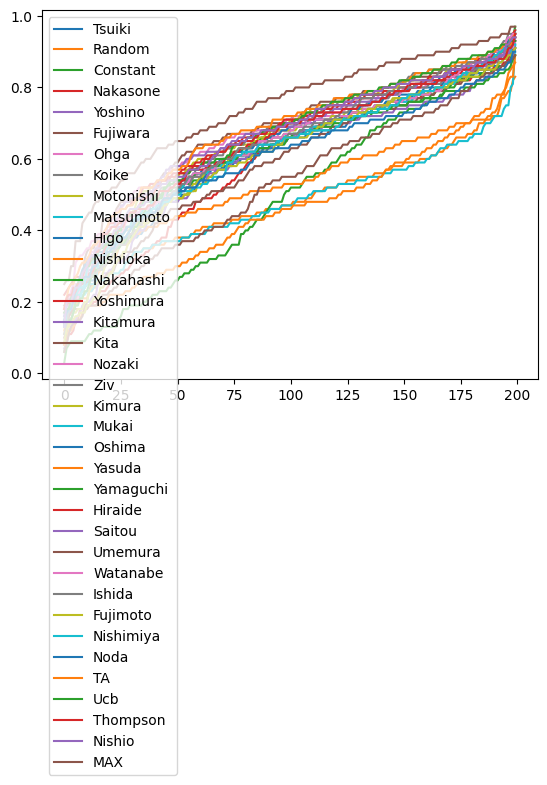

In [39]:
names = ["Tsuiki", "Random","Constant","Nakasone","Yoshino",\
        "Fujiwara","Ohga","Koike","Motonishi","Matsumoto",\
        "Higo","Nishioka","Nakahashi","Yoshimura","Kitamura",\
        "Kita","Nozaki","Ziv","Kimura","Mukai",\
         "Oshima","Yasuda","Yamaguchi","Hiraide","Saitou",\
         "Umemura","Watanabe","Ishida","Fujimoto","Nishimiya",\
         "Noda",\
         "TA","Ucb","Thompson","Nishio"]
numplay=200
ret = MultiMABTester(numplay, \
[TsuikiStrategy_B,RandomStrategy_B,ConstantStrategy_B,NakasoneStrategy_B,YoshinoStrategy_B,\
 FujiwaraStrategy_B,OhgaStrategy_B,KoikeStrategy_B,MotonishiStrategy_B,MatsumotoStrategy_B,\
 HigoStrategy_B,NishiokaStrategy_B,NakahashiStrategy_B,YoshimuraStrategy_B,KitamuraStrategy_B,\
 KitaStrategy_B,NozakiStrategy_B,ZivStrategy_B,KimuraStrategy_B,MukaiStrategy_B,\
 OshimaStrategy_B,YasudaStrategy_B,YamaguchiStrategy_B,HiraideStrategy_B,SaitouStrategy_B,\
 UmemuraStrategy_B,WatanabeStrategy_B,IshidaStrategy_B,FujimotoStrategy_B,NishimiyaStrategy_B,\
 NodaStrategy_B,\
 TAStrategy_B,UcbStrategy_B,ThompsonStrategy_B,NishioStrategy_B \
], change=True) #changeがTrueなので確率が変わるバージョン

names.append("MAX")
ret.sort(axis=1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
for i in range(len(names)):
    ax1.plot(ret[i], label=names[i])
ax1.legend(loc='upper left')
sorted(zip(map(lambda x: sum(x)/numplay,ret), names), reverse=True)

[(0.7612130000000152, 'MAX'),
 (0.6990080000000156, 'TA'),
 (0.689083000000012, 'Fujiwara'),
 (0.6825340000000105, 'Yoshimura'),
 (0.6777920000000062, 'Motonishi'),
 (0.6769140000000032, 'Ohga'),
 (0.6741930000000033, 'Nishio'),
 (0.6719050000000004, 'Saitou'),
 (0.6707610000000066, 'Ucb'),
 (0.6676890000000015, 'Thompson'),
 (0.6663669999999945, 'Hiraide'),
 (0.6611280000000014, 'Oshima'),
 (0.6608729999999939, 'Nozaki'),
 (0.6537869999999917, 'Watanabe'),
 (0.6530949999999962, 'Ziv'),
 (0.6517329999999969, 'Koike'),
 (0.6510960000000009, 'Ishida'),
 (0.6443009999999886, 'Nishimiya'),
 (0.6434179999999863, 'Tsuiki'),
 (0.6430039999999894, 'Kimura'),
 (0.6429439999999894, 'Mukai'),
 (0.6415319999999982, 'Nakahashi'),
 (0.6406609999999994, 'Higo'),
 (0.6376519999999892, 'Yoshino'),
 (0.6295179999999958, 'Yamaguchi'),
 (0.6153449999999903, 'Noda'),
 (0.6143759999999847, 'Kita'),
 (0.6109119999999961, 'Fujimoto'),
 (0.6058829999999988, 'Nakasone'),
 (0.6035459999999881, 'Kitamura'),
 (0.5

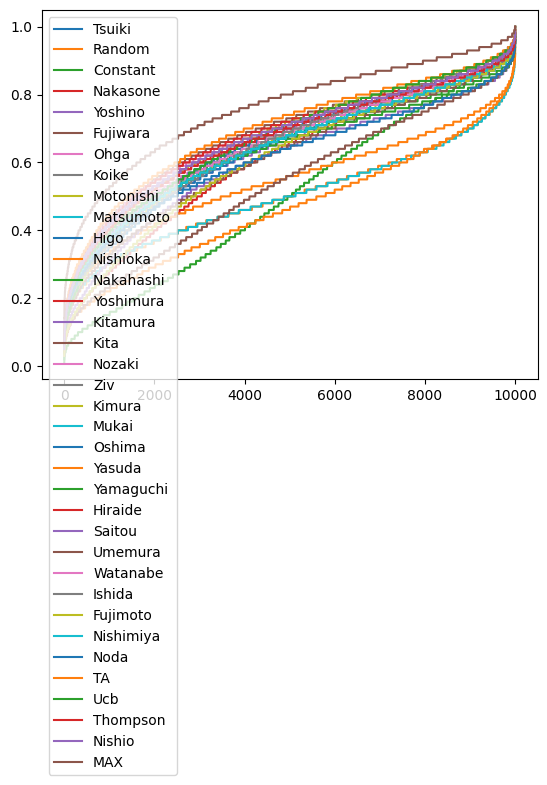

In [40]:
names = ["Tsuiki", "Random","Constant","Nakasone","Yoshino",\
        "Fujiwara","Ohga","Koike","Motonishi","Matsumoto",\
        "Higo","Nishioka","Nakahashi","Yoshimura","Kitamura",\
        "Kita","Nozaki","Ziv","Kimura","Mukai",\
         "Oshima","Yasuda","Yamaguchi","Hiraide","Saitou",\
         "Umemura","Watanabe","Ishida","Fujimoto","Nishimiya",\
         "Noda",\
         "TA","Ucb","Thompson","Nishio"]
numplay=10000
ret = MultiMABTester(numplay, \
[TsuikiStrategy_B,RandomStrategy_B,ConstantStrategy_B,NakasoneStrategy_B,YoshinoStrategy_B,\
 FujiwaraStrategy_B,OhgaStrategy_B,KoikeStrategy_B,MotonishiStrategy_B,MatsumotoStrategy_B,\
 HigoStrategy_B,NishiokaStrategy_B,NakahashiStrategy_B,YoshimuraStrategy_B,KitamuraStrategy_B,\
 KitaStrategy_B,NozakiStrategy_B,ZivStrategy_B,KimuraStrategy_B,MukaiStrategy_B,\
 OshimaStrategy_B,YasudaStrategy_B,YamaguchiStrategy_B,HiraideStrategy_B,SaitouStrategy_B,\
 UmemuraStrategy_B,WatanabeStrategy_B,IshidaStrategy_B,FujimotoStrategy_B,NishimiyaStrategy_B,\
 NodaStrategy_B,\
 TAStrategy_B,UcbStrategy_B,ThompsonStrategy_B,NishioStrategy_B \
], change=True) #changeがTrueなので確率が変わるバージョン

names.append("MAX")
ret.sort(axis=1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
for i in range(len(names)):
    ax1.plot(ret[i], label=names[i])
ax1.legend(loc='upper left')
sorted(zip(map(lambda x: sum(x)/numplay,ret), names), reverse=True)